In [1]:
import pandas as pd

df = pd.read_csv('../data/ecommerce_data.csv', encoding='ISO-8859-1')

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [2]:
df.shape

(541909, 8)

In [3]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(5268)

In [8]:
df = df.drop_duplicates()

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [11]:
missing_percent = df ['CustomerID'].isnull().sum()/len(df) *100

In [12]:
print(f"CustomerID missing:{missing_percent: .2f}%")

CustomerID missing: 25.16%


In [13]:
df = df.dropna(subset=['CustomerID'])

In [14]:
df = df.dropna(subset=['Description'])

In [15]:
df['Description'] = df['Description'].fillna('No Description')

In [16]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [17]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [18]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [19]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [20]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


In [21]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ','_')

In [22]:
df.columns

Index(['invoiceno', 'stockcode', 'description', 'quantity', 'invoicedate',
       'unitprice', 'customerid', 'country'],
      dtype='object')

In [23]:
# Handle Missing Values (Properly)
# Let’s drop rows with missing CustomerID, because:
# It’s an identifier (you can’t group customers if it's missing!)

df.dropna(subset=['customerid'], inplace = True)





In [24]:
df.isnull().sum()

invoiceno      0
stockcode      0
description    0
quantity       0
invoicedate    0
unitprice      0
customerid     0
country        0
dtype: int64

In [25]:
df[['quantity' , 'unitprice']].describe()

,quantity,unitprice
count,401604.000000,401604.000000
mean,12.183273,3.474064
std,250.283037,69.764035
min,-80995.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,38970.000000


In [26]:
df = df [(df['quantity'] > 0) & (df['unitprice'] > 0)]

In [27]:
#create helpful columns

df['sales'] = df['quantity']*df["unitprice"]

In [28]:
df['total_sales'] = df['unitprice']*df['quantity']

In [29]:
df.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,sales,total_sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,20.34


In [30]:
df[['unitprice','quantity']].head()

,unitprice,quantity
0,2.55,6
1,3.39,6
2,2.75,8
3,3.39,6
4,3.39,6


In [31]:
df['total_sales'].describe()

count    392692.000000
mean         22.631500
std         311.099224
min           0.001000
25%           4.950000
50%          12.450000
75%          19.800000
max      168469.600000
Name: total_sales, dtype: float64

In [32]:
top_products = df.groupby('description')['quantity'].sum().sort_values(ascending=False).head(10)
top_products

description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54319
JUMBO BAG RED RETROSPOT               46078
WHITE HANGING HEART T-LIGHT HOLDER    36706
ASSORTED COLOUR BIRD ORNAMENT         35263
PACK OF 72 RETROSPOT CAKE CASES       33670
POPCORN HOLDER                        30919
RABBIT NIGHT LIGHT                    27153
MINI PAINT SET VINTAGE                26076
Name: quantity, dtype: int64

<Axes: title={'center': 'Top 10 best selling products!'}, xlabel='description'>

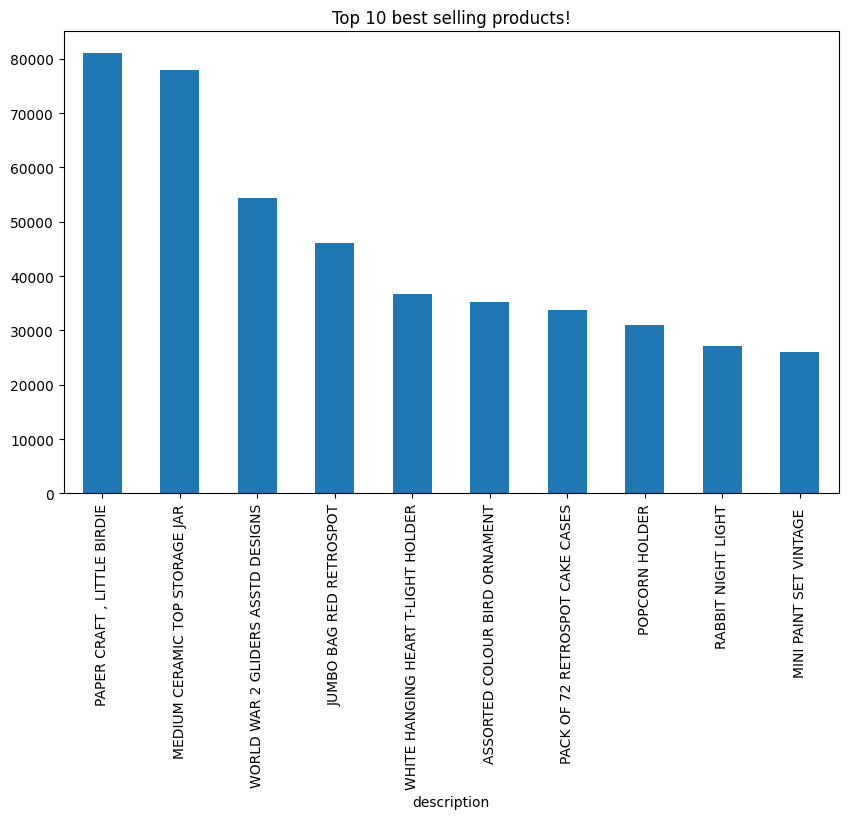

In [33]:
top_products.plot (kind ='bar', figsize=(10,6), title = "Top 10 best selling products!")

In [34]:
top_countries = df.groupby('country')['total_sales'].sum().sort_values(ascending=False).head(10)
top_countries

country
United Kingdom    7285024.644
Netherlands        285446.340
EIRE               265262.460
Germany            228678.400
France             208934.310
Australia          138453.810
Spain               61558.560
Switzerland         56443.950
Belgium             41196.340
Sweden              38367.830
Name: total_sales, dtype: float64

<Axes: title={'center': 'Top 10 countries with high revenue'}, xlabel='country'>

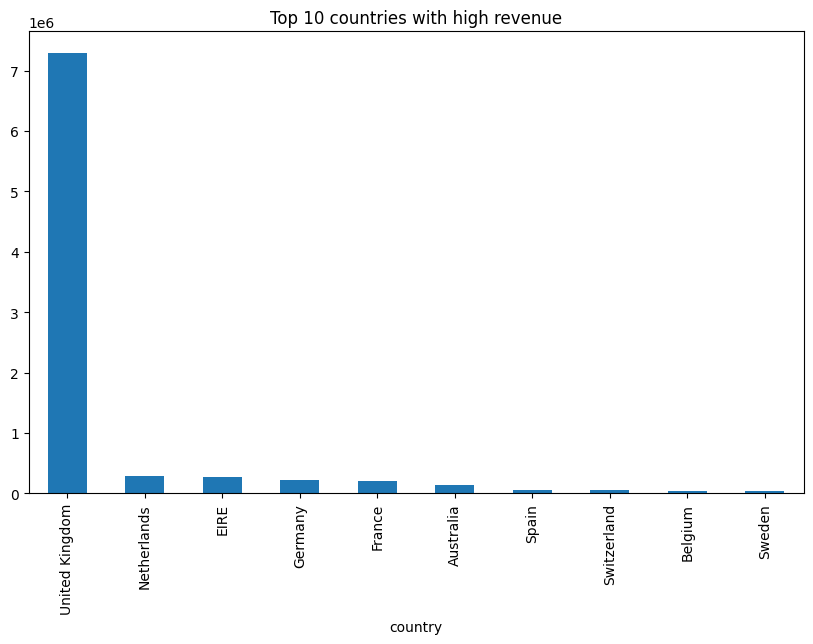

In [35]:
top_countries.plot (kind= 'bar',figsize=(10,6) , title = 'Top 10 countries with high revenue')

In [36]:
df['invoice_month'] = df['invoicedate'].dt.to_period('M')

In [37]:
monthly_sales = df.groupby('invoice_month')['total_sales'].sum()

<Axes: title={'center': 'Monthly revenue over time!'}, xlabel='invoice_month'>

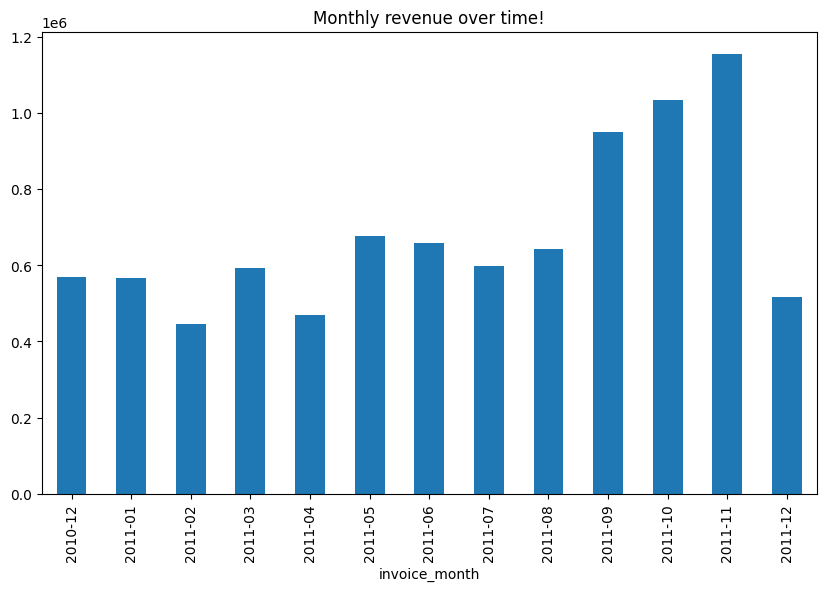

In [38]:
monthly_sales.plot  (kind ='bar', figsize = (10,6) , title = "Monthly revenue over time!")

In [39]:
customer_sales = df.groupby('customerid')['total_sales'].sum().sort_values(ascending = False)

In [40]:
top_customers = customer_sales.head(10)
print (top_customers)

customerid
14646.0    280206.02
18102.0    259657.30
17450.0    194390.79
16446.0    168472.50
14911.0    143711.17
12415.0    124914.53
14156.0    117210.08
17511.0     91062.38
16029.0     80850.84
12346.0     77183.60
Name: total_sales, dtype: float64
